#  Análisis 1 — Impacto del Tiempo de Pantalla en el Índice de Felicidad

##  Objetivo
Evaluar cómo varía el nivel de felicidad según el tiempo diario de pantalla, identificando posibles tendencias, correlaciones o patrones que permitan determinar si un mayor tiempo de uso de dispositivos digitales influye en el bienestar general.

##  Descripción
En esta primera etapa del análisis se examina la relación entre el tiempo de pantalla y el índice de felicidad. Para ello, se aplican estadísticas descriptivas, análisis exploratorio y visualizaciones que permiten detectar comportamientos, distribuciones y posibles asociaciones entre ambas variables. Este análisis sienta las bases para comprender cómo el uso de dispositivos puede afectar los niveles de felicidad reportados.



In [26]:
#Configuración del entorno (paths + imports del sistema)
import os
import sys

# Agregar el directorio padre al sys.path
parent_dir = os.path.abspath(os.path.join(os.getcwd(), '..'))
if parent_dir not in sys.path:
    sys.path.append(parent_dir)

print(f"Ruta principal añadida a sys.path: {parent_dir}")


Ruta principal añadida a sys.path: c:\Users\Juan Pablo\Desktop\ENOVA\Proyectos de desarrollo\redes_salud_mental\impacto_tiempo_pantalla_felicidad


In [27]:
#Imports principales del proyecto
# Librerías principales
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Módulos propios
from src.carga import cargar_dataset
from src import analisisPreprocesamiento


In [28]:
#Carga del dataset + exploración inicial
# Cargar dataset
df = cargar_dataset('../data/raw/Mental_Health_and_Social_Media_Balance_Dataset.csv')

# Exploración inicial
analisisPreprocesamiento.explorar_dataset(df)



 Primeras filas:
  User_ID  Age  Gender  Daily_Screen_Time(hrs)  Sleep_Quality(1-10)  \
0    U001   44    Male                     3.1                  7.0   
1    U002   30   Other                     5.1                  7.0   
2    U003   23   Other                     7.4                  6.0   
3    U004   36  Female                     5.7                  7.0   
4    U005   34  Female                     7.0                  4.0   

   Stress_Level(1-10)  Days_Without_Social_Media  Exercise_Frequency(week)  \
0                 6.0                        2.0                       5.0   
1                 8.0                        5.0                       3.0   
2                 7.0                        1.0                       3.0   
3                 8.0                        1.0                       1.0   
4                 7.0                        5.0                       1.0   

  Social_Media_Platform  Happiness_Index(1-10)  
0              Facebook              

In [29]:
#Exportamos el csv pre analizado. 
df.to_csv('..\\data\\processed\\pre_analizado.csv', index=False)

#Impacto del tiempo en pantalla sobre la felicidad. 

In [30]:
# Seleccionar las columnas relevantes para el análisis
#Selección de columnas relevantes para el análisis. 
subset = df[['Daily_Screen_Time(hrs)', 'Happiness_Index(1-10)','Age', 'Gender']]

In [31]:
# Renombrar columnas para facilitar su uso en el análisis
#Renombramois la columnas seleccionadas para facilitar su manejo. 
subset = subset.rename(columns={
    'Daily_Screen_Time(hrs)': 'ScreenTime', 'Happiness_Index(1-10)': 'HappinessIndex'})

# Rango Intercuartílico (IQR)

El **Rango Intercuartílico (IQR)** es una medida de dispersión utilizada para evaluar la variabilidad de los datos en torno a la mediana. Su principal utilidad radica en que excluye el efecto de valores extremos (*outliers*), lo que lo convierte en una métrica robusta dentro del análisis exploratorio de datos (EDA).

---

## Definición

El IQR se obtiene a partir de los *cuartiles*, que dividen el conjunto de datos ordenados en cuatro partes iguales:

| Cuartil | Descripción                 | % de datos por debajo |
|---------|------------------------------|-------------------------|
| Q1      | Primer cuartil               | 25%                    |
| Q2      | Mediana (segundo cuartil)    | 50%                    |
| Q3      | Tercer cuartil               | 75%                    |

La fórmula del IQR es:

$$
IQR = Q3 - Q1
$$

---

## Interpretación

El IQR representa el rango donde se concentra el **50% de las observaciones centrales**:

- **IQR reducido:** indica baja dispersión; los valores están próximos a la mediana.  
- **IQR amplio:** indica mayor variabilidad dentro de la zona central de los datos.

Esta medida es especialmente útil cuando se trabaja con distribuciones asimétricas o con presencia de valores extremos.

---

## Identificación de valores atípicos

El IQR también permite establecer límites para detectar posibles valores atípicos. Un dato se considera fuera del rango esperado si se ubica:

- **Por debajo del límite inferior:**

  $$
  Q1 - 1.5 \times IQR
  $$

- **Por encima del límite superior:**

  $$
  Q3 + 1.5 \times IQR
  $$

Estos umbrales sirven como guía inicial para identificar valores que podrían requerir revisión o tratamiento adicional durante el análisis.


In [32]:
# Calcular IQR y detectar outliers en la columna 'ScreenTime'
Q1 = subset['ScreenTime'].quantile(0.25)
Q3 = subset['ScreenTime'].quantile(0.75)

IQR = Q3 - Q1
# Filtramos las filas del DataFrame 'subset' que tienen valores atípicos (outliers)
# en la columna 'ScreenTime' utilizando el método del IQR.

outliers = subset[
    
    # Primera condición:
    # Detecta valores que están MUCHO más abajo de lo normal.
    # Si ScreenTime es menor que (Q1 - 1.5 * IQR), se considera un outlier inferior.
    (subset['ScreenTime'] < (Q1 - 1.5 * IQR)) 
    
    
    |  # El operador OR: si se cumple una de las dos condiciones, la fila se marca como outlier.
    
    
    # Segunda condición:
    # Detecta valores que están mucho más arriba de lo normal.
    # Si ScreenTime supera (Q3 + 1.5 * IQR), se considera un outlier superior.
    (subset['ScreenTime'] > (Q3 + 1.5 * IQR))
]

In [33]:
# Calcular y mostrar los límites inferior y superior basados en IQR
valor_inferior = (Q1 - 1.5 * IQR).__round__(2)
valor_superior = (Q3 + 1.5 * IQR).__round__(2)

print(f'Valor real del IQR: {(IQR).__round__(2)}')
print(f'Valor real de la condición inferior: {valor_inferior}')
print(f'Valor real de la condición superior: {valor_superior}')

Valor real del IQR: 2.4
Valor real de la condición inferior: 0.7
Valor real de la condición superior: 10.3


In [34]:
# Mostrar filas identificadas como outliers y tomar el primer outlier superior
print(f'Outliers basados en Screen Time:\n{outliers}')
outlier_sup = outliers['ScreenTime'].iloc[0]



Outliers basados en Screen Time:
     ScreenTime  HappinessIndex  Age  Gender
248        10.8             4.0   46  Female
325        10.8             5.0   27    Male


In [35]:
# Calcular la mediana de ScreenTime
median_screen_time = subset['ScreenTime'].median()

Este resultado indica que existen dos valores atipicos en el análisis: 
- En la fila 248,
- En la fila 325. 

Si bien estos dos valores no son muy diferentes al resto (cantidad de horas de pantalla) se pueden identificar como extremos. 

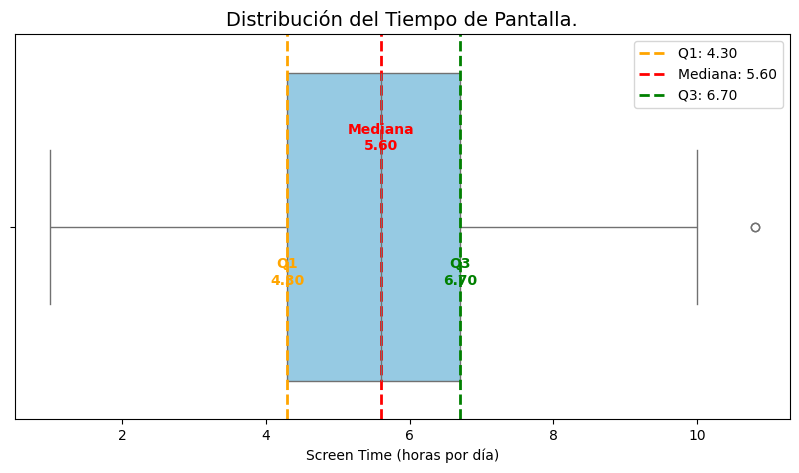

In [36]:
plt.figure(figsize=(10, 5))

# Boxplot limpio
sns.boxplot(data=subset, x='ScreenTime', color='#89CFF0')
plt.title('Distribución del Tiempo de Pantalla.', fontsize=14)
plt.xlabel('Screen Time (horas por día)')

# Líneas verticales para Q1, mediana y Q3
plt.axvline(Q1, color='orange', linestyle='--', linewidth=2, label=f'Q1: {Q1:.2f}')
plt.axvline(median_screen_time, color='red', linestyle='--', linewidth=2, label=f'Mediana: {median_screen_time:.2f}')
plt.axvline(Q3, color='green', linestyle='--', linewidth=2, label=f'Q3: {Q3:.2f}')

# Anotaciones 
plt.text(Q1, 0.15, f"Q1\n{Q1:.2f}", ha='center', color='orange', fontsize=10, weight='bold')
plt.text(median_screen_time, -0.20, f"Mediana\n{median_screen_time:.2f}", ha='center', color='red', fontsize=10, weight='bold')
plt.text(Q3, 0.15, f"Q3\n{Q3:.2f}", ha='center', color='green', fontsize=10, weight='bold')

plt.legend(loc='upper right')
plt.show()


## Interpretación de los Resultados del IQR

A partir del cálculo del IQR y sus límites asociados, se obtiene lo siguiente:

- **Límite inferior:** 0.7  
  Cualquier valor menor a **0.7 horas diarias** se considera un *outlier* inferior.

- **Límite superior:** 10.3  
  Cualquier valor mayor a **10.3 horas diarias** se clasifica como *outlier* superior.

### Implicaciones

- Usuarios que reportan **menos de 0.7 horas** de uso diario (aprox. 40 minutos) son considerados observaciones atípicas.  
- Usuarios que reportan **más de 10.3 horas** de uso diario también son catalogados como valores atípicos.

---

## Outliers Identificados

El análisis detectó dos valores atípicos, ambos con un registro de **10.8 horas diarias**, correspondientes a usuarios de género masculino y femenino.  
Dado que estos valores superan el límite superior establecido, se clasifican formalmente como *outliers*.

---

## ¿Son outliers imposibles o simplemente poco frecuentes?

- Un registro de **10.8 horas de pantalla diaria** es plenamente posible en la vida real.  
- Aunque no es habitual, existen personas que pasan entre **10 y 12 horas** frente a pantallas debido a hábitos laborales, académicos o personales.

Por lo tanto, estos valores pueden caracterizarse como:

- **Atípicos desde el punto de vista estadístico**,  
- **Realistas desde una perspectiva conductual o humana**.

---

## Decisión Analítica

Se decidió **mantener estos valores en el análisis**, ya que representan un segmento relevante del fenómeno en estudio: usuarios con muy alto tiempo de pantalla.  
Excluirlos podría limitar la comprensión de los extremos del comportamiento que queremos analizar.



## Cálculo de la Correlación entre *Screen Time* y *Happiness*

La **correlación de Pearson** es una medida estadística que cuantifica el grado de relación lineal entre dos variables, indicando no solo si están asociadas, sino también la **dirección** y **fuerza** de dicha relación.

En este caso, buscamos determinar qué tan vinculados están el **tiempo de pantalla diario** y el **índice de felicidad**, y si ambas variables tienden a aumentar o disminuir conjuntamente.


In [37]:
# Calcular la matriz de correlación entre ScreenTime y HappinessIndex
subset[['ScreenTime', 'HappinessIndex']].corr().__round__(2)

,ScreenTime,HappinessIndex
ScreenTime,1.00,-0.71
HappinessIndex,-0.71,1.00


## Interpretación de la Correlación

La correlación de Pearson toma valores entre **-1 y 1**, donde:

- Valores cercanos a **1** indican una relación positiva fuerte  
  (a mayor *ScreenTime*, mayor *HappinessIndex*).
- Valores cercanos a **-1** reflejan una relación negativa fuerte  
  (a mayor *ScreenTime*, menor *HappinessIndex*).
- Valores próximos a **0** sugieren ausencia de relación lineal significativa.

---

## Análisis del Resultado

El coeficiente obtenido (**r = -0.71**) muestra una **correlación negativa fuerte** entre el tiempo de pantalla y el índice de felicidad.  
Esto sugiere que los usuarios con mayor exposición diaria a pantallas tienden a reportar menores niveles de felicidad.

Si bien el resultado revela una asociación estadística clara, es importante recordar que **correlación no implica causalidad**.  
Este análisis no permite afirmar que un mayor uso de pantallas cause directamente una disminución en la felicidad, pero sí evidencia un patrón consistente que merece atención.


## Graficación de la Correlación mediante un Gráfico de Dispersión (Scatter Plot)

Para complementar el análisis numérico de la correlación, se utiliza un **gráfico de dispersión** junto con una **línea de tendencia**.  
Este tipo de visualización permite observar la relación entre *ScreenTime* (variable independiente) y *HappinessIndex* (variable dependiente).

A continuación se detalla la función de cada componente empleado para construir la línea de tendencia.

---

### 🔹 Ajuste del modelo lineal — `np.polyfit(x, y, 1)`

`np.polyfit()` ajusta un polinomio a un conjunto de puntos utilizando el método de **mínimos cuadrados**.

Parámetros usados:

- **x** → valores independientes (*ScreenTime*)  
- **y** → valores dependientes (*HappinessIndex*)  
- **1** → grado del polinomio, indicando que se ajustará una **recta**:  
  \[
  y = m \cdot x + b
  \]

El resultado son dos coeficientes:

- **m**: pendiente  
- **b**: intercepto  

Estos valores describen la recta que mejor se ajusta a la distribución de datos.

---

### 🔹 Conversión a función — `np.poly1d(coeficientes)`

`np.poly1d()` transforma los coeficientes obtenidos con `polyfit` en una función polinómica.

Ejemplo conceptual:

- Si los coeficientes son `[m, b]`, entonces se construye:  
  \[
  f(x) = m \cdot x + b
  \]

Esta función permite calcular fácilmente los valores de la recta para cualquier conjunto de valores *x*.

---

### 🔹 Graficación de la línea de tendencia — `plt.plot(x, poly1d_fn(x))`

Una vez creada la función de la recta:

- Se toma nuevamente el conjunto de valores *x*
- Se calculan los valores correspondientes de la recta mediante `poly1d_fn(x)`
- Se grafica la línea resultante sobre el mismo scatter plot

De este modo se visualiza claramente:

- la dirección de la relación (positiva o negativa),
- la fuerza de la tendencia,
- y el ajuste general entre ambas variables.

---

En conjunto, estos pasos permiten complementar el análisis estadístico con una representación visual clara y consistente sobre cómo varían los niveles de felicidad en función del tiempo de pantalla.


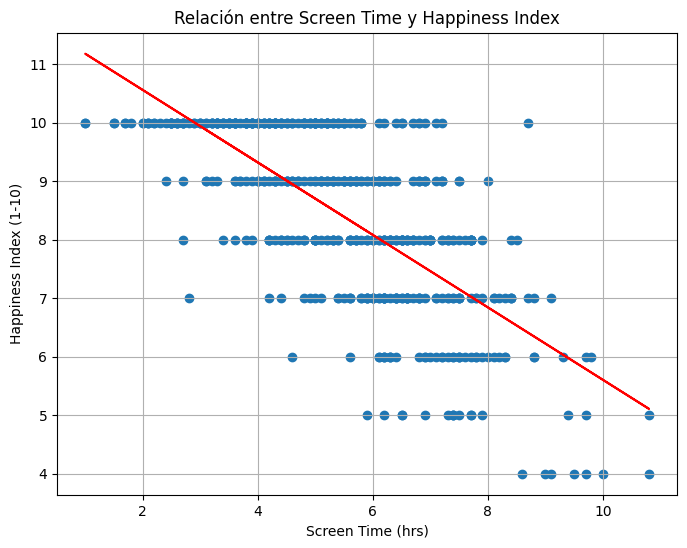

In [38]:
# Graficar dispersión entre ScreenTime y HappinessIndex y ajustar línea de regresión

#Variables
screen_time = subset['ScreenTime']
happiness_index = subset['HappinessIndex']

#Creación de la figura. 
plt.figure(figsize=(8,6))
#Scatter plot
plt.scatter(screen_time, happiness_index)

#Crear la línea de regresión
coef = np.polyfit(screen_time,happiness_index,1) #Ajuste lineal
poly1d_fn = np.poly1d(coef) #Modelo de la recta
plt.plot(screen_time, poly1d_fn(screen_time), color='red') #Dibujar la línea de regresión

#Etiuetas y título
plt.title('Relación entre Screen Time y Happiness Index')
plt.xlabel('Screen Time (hrs)')
plt.ylabel('Happiness Index (1-10)')
plt.grid()
plt.show()



## Conclusión del Gráfico de Dispersión

El gráfico de dispersión confirma visualmente la relación negativa observada en el análisis de correlación. A medida que aumentan las horas diarias de uso de pantalla, los valores del índice de felicidad tienden a descender. Esto se evidencia en la **tendencia general de los puntos**, así como en la **línea de regresión**, que presenta una pendiente claramente negativa.

La correlación previamente calculada (**r = -0.71**) es coherente con esta representación gráfica, indicando una relación negativa fuerte entre ambas variables. Si bien existe cierta dispersión natural en los datos —ya que no todos los puntos se alinean perfectamente con la recta— la tendencia general es consistente y suficientemente clara.

En términos prácticos, los usuarios con mayor tiempo frente a pantallas tienden a reportar niveles de felicidad más bajos, mientras que aquellos con menor exposición suelen presentar valores más altos. Este hallazgo refuerza la asociación estadística entre ambas variables, aunque no permite establecer causalidad.


En el análisis subsiguiente, procederemos a agrupar el tiempo de pantalla en tres categorías discretas diferentes: 
- Bajo, 
- Medio, 
- Alto. 
De esta manera podremos calcular el promedio de 'felicidad' en base a las horas de exposición díarias de pantalla. 

In [39]:
# Agrupar ScreenTime en categorías discretas (Bajo/Medio/Alto)
#Agreupamos el tiempo en pantalla en categrías discretas para comparar promedios.
subset['ScreenGroup'] = pd.cut(subset['ScreenTime'],
                              bins = [0, 3, 6, 10],
                              labels=['Bajo', 'Medio', 'Alto']
                              )


In [40]:
# Calcular promedio de HappinessIndex por cada grupo de ScreenTime
subset.groupby('ScreenGroup')['HappinessIndex'].mean().round(2)

C:\Users\Juan Pablo\AppData\Local\Temp\ipykernel_16232\3785252271.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  subset.groupby('ScreenGroup')['HappinessIndex'].mean().round(2)


ScreenGroup
Bajo     9.82
Medio    9.04
Alto     7.28
Name: HappinessIndex, dtype: float64

## Conclusión del Análisis

Los resultados obtenidos muestran una relación clara y consistente entre el tiempo de pantalla y los niveles de felicidad reportados por los usuarios:

- A medida que aumenta el tiempo diario de pantalla, el **índice de felicidad disminuye**.
- Los usuarios con **bajo uso de pantalla** presentan los valores de felicidad más altos del conjunto.
- El grupo de **uso medio** muestra una ligera disminución en comparación con el grupo de bajo uso.
- Los usuarios con **alto tiempo de pantalla** registran los niveles de felicidad más bajos.

La diferencia entre los extremos es especialmente notable:  
**9.82 (bajo uso) vs. 7.28 (alto uso)**, una caída aproximada de **2.5 puntos** en una escala del 1 al 10.  
Esto representa una diferencia considerable en términos de bienestar percibido.

En conjunto, los indicadores (correlación, agrupación por niveles de uso y visualizaciones) refuerzan la misma conclusión: existe una **asociación negativa fuerte** entre el tiempo de pantalla y la felicidad. Aunque no se puede afirmar causalidad, la tendencia observada es sólida y consistente.
